In [1]:
import tushare as ts
from tushare_token_manager.token_manager import get_valid_token

token = get_valid_token()
ts.set_token(token)

df = ts.pro_api().index_daily(
    ts_code="000001.SH", start_date="20250620", end_date="20250628"  # 上证指数
)
print(df.head())

✓ 从缓存读取到Token，正在验证...
 ✗ Token验证失败: 您的token不对，请确认。
缓存的token无效，尝试获取新token...
正在获取最新token...
 ✓ 获取新token成功: tushare_5000积分_token
 ✓ 新token为: 80a24fdff25c228cf600039e6dfebde11368ff2dddf22de21b5de771
 调用次数: 13/60

 ===通知: 开始供应股票历史分钟、新闻资讯、港股、美股、实时行情等独立权限数据，通过sdk调取，有需要可下单=== 

✓ Token已保存到 /Users/hao/Desktop/emailreport/config.json
正在验证新token...
 ✓ Token验证成功
     ts_code trade_date      close       open       high        low  \
0  000001.SH   20250627  3424.2267  3450.6863  3462.6273  3421.0403   
1  000001.SH   20250626  3448.4534  3451.7193  3462.7520  3446.1855   
2  000001.SH   20250625  3455.9736  3419.0914  3459.0093  3417.4105   
3  000001.SH   20250624  3420.5660  3380.0800  3423.7835  3380.0800   
4  000001.SH   20250623  3381.5816  3349.4603  3389.4524  3347.6508   

   pre_close   change  pct_chg          vol       amount  
0  3448.4534 -24.2267  -0.7025  523129432.0  605731616.3  
1  3455.9736  -7.5202  -0.2176  496541077.0  603095111.9  
2  3420.5660  35.4076   1.0351  509384064.

In [17]:
import pandas as pd
import tushare as ts
import os
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from typing import Iterable

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
pro = ts.pro_api(token)

In [5]:
etf_dict = {
    "国内指数": {
        "上证50ETF": "510050.SH",
        "沪深300ETF": "510300.SH",
        "中证1000ETF": "512100.SH",
        "创业板ETF": "159915.SZ",
        "科创50ETF": "588080.SH",
    },
    "国际指数": {
        "纳指ETF": "513100.SH",
        "德国30ETF": "513030.SH",
        "法国40": "513080.SH",
        "日经ETF": "513520.SH",
        "沙特ETF": "520830.SH",
        "港股通互联网ETF": "159792.SZ",
        "港股创新药ETF": "159567.SZ",
        "东南亚科技": "513730.SH",
        "中概互联": "513220.SH",
    },
    "行业题材": {
        "芯片ETF": "588200.SH",
        "人工智能ETF": "515070.SH",
        "机器人ETF": "562500.SH",
        "软件服务ETF": "159852.SZ",
        "动漫游戏ETF": "159869.SZ",
        "车电池ETF": "159755.SZ",
        "证券公司ETF": "512000.SH",
        "银行ETF": "512800.SH",
        "房地产ETF": "512200.SH",
        "有色ETF": "512400.SH",
        "化工ETF": "159870.SZ",
        "煤炭ETF": "515220.SH",
        "稀土ETF": "516150.SH",
        "消费ETF": "159928.SZ",
        "白酒ETF": "161725.SZ",
        "医疗ETF": "512170.SH",
        "畜牧业ETF": "159865.SZ",
        "军工ETF": "512660.SH",
        "中药ETF": "560080.SH"
    },
    "大宗商品": {
        "黄金ETF": "518880.SH",
        "原油ETF": "513690.SH"
    }
}

In [3]:
df_etf = pd.read_csv('./data/etfindex.csv')

In [4]:
df_etf

,ts_code,trade_date,pre_close,open,high,low,close,change,pct_chg,vol,amount
0,159567.SZ,20240111,1.006,1.007,1.015,0.995,1.004,-0.002,-0.1988,2876393.58,289360.641
1,159567.SZ,20240112,1.004,0.995,1.003,0.981,0.981,-0.023,-2.2908,428293.09,42358.850
2,159567.SZ,20240115,0.981,0.981,0.997,0.978,0.982,0.001,0.1019,506314.39,50024.738
3,159567.SZ,20240116,0.982,0.983,0.988,0.965,0.971,-0.011,-1.1202,492259.30,48102.126
4,159567.SZ,20240117,0.971,0.972,0.972,0.921,0.924,-0.047,-4.8404,405796.87,38489.347
...,...,...,...,...,...,...,...,...,...,...,...
48578,588200.SH,20251020,2.303,2.350,2.377,2.292,2.313,0.010,0.4342,16164953.74,3777908.669
48579,588200.SH,20251021,2.313,2.325,2.396,2.309,2.387,0.074,3.1993,18516299.29,4371599.841
48580,588200.SH,20251022,2.387,2.356,2.428,2.333,2.390,0.003,0.1257,15227586.44,3620042.425
48581,588200.SH,20251023,2.390,2.365,2.378,2.328,2.372,-0.018,-0.7531,12300658.18,2889001.392


In [8]:
def calc_consecutive_negative_prob_with_turnover(
    df: pd.DataFrame,
    Ns: Iterable[int] = (3,4,5,6,7,8,9,10),
    ts_col: str = "ts_code",
    date_col: str = "trade_date",
    close_col: str = "close",
    sort_ascending: bool = True,
) -> pd.DataFrame:
    """
    对每个标的计算：
      1) 每个 N 下 "连续 N 天 pct_chg < 0" 的滑动窗口概率 p(N)
      2) 按公式 (p(N) - p(N+1)) / p(N) 计算在连续 N 天后**次日不再下跌（按公式）**的概率（若 p(N)==0 则为 NaN）

    输入 df 应包含 ts_code, trade_date, close 三列。若原表已有 pct_chg 也可使用（函数内部按 close 计算）。
    返回 DataFrame，index 为 ts_code，列按顺序为 每个 N 的 n连跌概率 与对应的 次日上涨概率，结果以百分数字符串（如"10.2%"）显示。
    ts_code后增加一列显示ETF名称。
    """
    # 构建 code -> 名称 映射
    etf_name_map = {}
    for group in etf_dict.values():
        for name, code in group.items():
            etf_name_map[code] = name

    if ts_col not in df.columns or date_col not in df.columns or close_col not in df.columns:
        raise ValueError(f"输入 df 必须包含列: {ts_col}, {date_col}, {close_col}")

    tmp = df[[ts_col, date_col, close_col]].copy()
    try:
        tmp[date_col] = pd.to_datetime(tmp[date_col])
    except Exception:
        pass

    Ns = list(Ns)
    results = {}

    for ts, group in tmp.groupby(ts_col):
        g = group.sort_values(by=date_col, ascending=sort_ascending).reset_index(drop=True)
        pct = g[close_col].pct_change(1) * 100  # 百分比
        is_neg = (pct < 0)
        is_valid = pct.notna()

        # 先计算 p(N) 和 window counts
        pN = {}
        total_windows_N = {}
        for N in Ns + [max(Ns)+1]:  # 预先计算 up to N+1 以便后续计算 p(N+1)
            if len(pct) < N:
                pN[N] = np.nan
                total_windows_N[N] = 0
                continue
            rolling_neg_sum = is_neg.rolling(window=N, min_periods=N).sum()
            rolling_valid_sum = is_valid.rolling(window=N, min_periods=N).sum()
            windows_all_neg = int((rolling_neg_sum == N).sum())
            total_windows = int((rolling_valid_sum == N).sum())
            p = windows_all_neg / total_windows if total_windows > 0 else np.nan
            pN[N] = p
            total_windows_N[N] = total_windows

        row = {}
        row["etf名称"] = etf_name_map.get(ts, "")  # 新增ETF名称列
        for N in Ns:
            p_curr = pN.get(N, np.nan)
            p_next = pN.get(N+1, np.nan)
            # 按用户公式计算次日不再下跌概率 (p(N)-p(N+1))/p(N)
            if (p_curr is None) or (p_curr!=p_curr) or p_curr == 0:  # NaN check or zero
                turn = np.nan
            else:
                turn = (p_curr - p_next) / p_curr if (p_next==p_next) else np.nan
            # 百分数字符串
            row[f"{N}连跌概率"] = f"{round(p_curr*100, 1)}%" if p_curr == p_curr else ""
            row[f"{N}次日上涨概率"] = f"{round(turn*100, 1)}%" if turn == turn else ""

        results[ts] = row

    out = pd.DataFrame.from_dict(results, orient="index")
    # 保证列顺序：etf名称、N连跌概率、N次日上涨概率、...
    cols = ["etf名称"]
    for N in Ns:
        cols.append(f"{N}连跌概率")
        cols.append(f"{N}次日上涨概率")
    out = out[cols]
    out.index.name = ts_col
    return out

In [13]:
probs = calc_consecutive_negative_prob_with_turnover(df_etf)
probs
# probs.to_csv('./data/反转概率.csv', encoding='utf-8-sig')

,etf名称,3连跌概率,3次日上涨概率,4连跌概率,4次日上涨概率,5连跌概率,5次日上涨概率,6连跌概率,6次日上涨概率,7连跌概率,7次日上涨概率,8连跌概率,8次日上涨概率,9连跌概率,9次日上涨概率,10连跌概率,10次日上涨概率
ts_code,,,,,,,,,,,,,,,,,
159567.SZ,港股创新药ETF,10.3%,61.3%,4.0%,70.5%,1.2%,80.0%,0.2%,100.0%,0.0%,,0.0%,,0.0%,,0.0%,
159755.SZ,车电池ETF,13.4%,52.8%,6.3%,48.4%,3.3%,55.8%,1.4%,60.0%,0.6%,50.0%,0.3%,33.3%,0.2%,50.0%,0.1%,100.0%
159792.SZ,港股通互联网ETF,11.4%,55.3%,5.1%,54.0%,2.3%,60.8%,0.9%,66.6%,0.3%,66.6%,0.1%,100.0%,0.0%,,0.0%,
159852.SZ,软件服务ETF,11.1%,50.8%,5.5%,51.6%,2.6%,60.0%,1.1%,66.6%,0.4%,100.0%,0.0%,,0.0%,,0.0%,
159865.SZ,畜牧业ETF,12.6%,48.2%,6.5%,52.0%,3.1%,54.2%,1.4%,68.7%,0.4%,100.0%,0.0%,,0.0%,,0.0%,
159869.SZ,动漫游戏ETF,10.3%,58.6%,4.3%,66.6%,1.4%,56.2%,0.6%,42.8%,0.4%,75.0%,0.1%,100.0%,0.0%,,0.0%,
159870.SZ,化工ETF,10.9%,54.1%,5.0%,53.5%,2.3%,50.0%,1.2%,46.1%,0.6%,71.4%,0.2%,100.0%,0.0%,,0.0%,
159915.SZ,创业板ETF,11.6%,54.7%,5.3%,56.2%,2.3%,56.5%,1.0%,55.0%,0.5%,44.4%,0.3%,40.0%,0.2%,66.6%,0.1%,100.0%
159928.SZ,消费ETF,12.4%,49.8%,6.2%,56.4%,2.7%,50.0%,1.4%,48.1%,0.7%,64.3%,0.3%,40.0%,0.2%,33.3%,0.1%,50.0%


In [14]:
probs.columns

Index(['etf名称', '3连跌概率', '3次日上涨概率', '4连跌概率', '4次日上涨概率', '5连跌概率', '5次日上涨概率',
       '6连跌概率', '6次日上涨概率', '7连跌概率', '7次日上涨概率', '8连跌概率', '8次日上涨概率', '9连跌概率',
       '9次日上涨概率', '10连跌概率', '10次日上涨概率'],
      dtype='object')

/var/folders/zs/v3w4zkgn4f1b1cghz0w3hj_h0000gn/T/ipykernel_23663/32365653.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heat_numeric = heat_df.applymap(to_percent_num)
/var/folders/zs/v3w4zkgn4f1b1cghz0w3hj_h0000gn/T/ipykernel_23663/32365653.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = heat_numeric.applymap(lambda v: f"{v:.1f}%" if v == v and not np.isnan(v) else "")
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36830 (\N{CJK UNIFIED IDEOGRAPH-8FDE}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36300 (\N{CJK UNIFIED IDEOGRAPH-8DCC}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27010 (\N{CJK UNIFIED IDEOGRAPH-6982}) missing from font(s) Arial.
  fig.ca

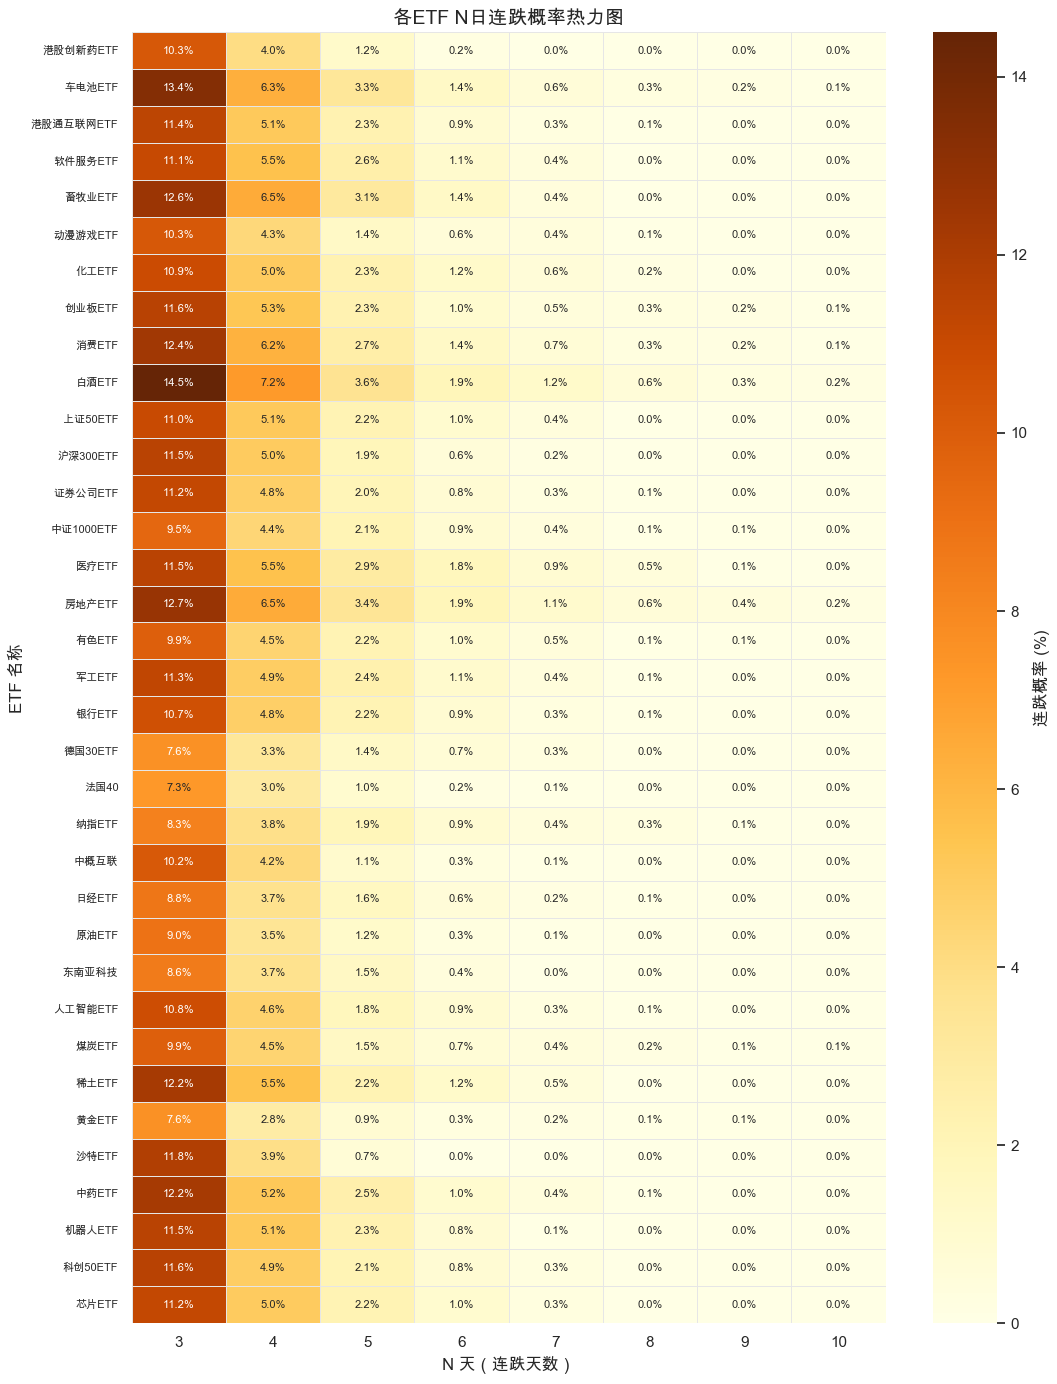

In [20]:
# ...existing code...
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 确认 probs 已存在
try:
    probs
except NameError:
    raise RuntimeError("变量 `probs` 未定义，请先运行计算概率的 cell（生成 probs）。")

# 构建 code -> 名称 映射（使用已有 etf_dict）
etf_name_map = {}
for group in etf_dict.values():
    for name, code in group.items():
        etf_name_map[code] = name

# 提取所有表示连跌概率的列，按 N 数字排序
cols = [c for c in probs.columns if re.search(r"\d+\s*连", c) or re.search(r"连跌", c)]
def extract_N(col):
    m = re.search(r"(\d+)", col)
    return int(m.group(1)) if m else 0
cols_sorted = sorted(cols, key=extract_N)

if not cols_sorted:
    raise RuntimeError("在 probs.columns 中未找到任何 '连跌' 列。列名示例：'3连跌概率'。")

# 构建用于绘图的 DataFrame（数值化，单位为百分比数字）
heat_df = probs[cols_sorted].copy()

def to_percent_num(x):
    if pd.isna(x) or x == "":
        return np.nan
    if isinstance(x, str) and x.strip().endswith("%"):
        try:
            return float(x.strip().rstrip("%"))
        except:
            return np.nan
    try:
        return float(x) * 100 if abs(float(x)) <= 1 and "%" not in str(x) else float(x)
    except:
        return np.nan

heat_numeric = heat_df.applymap(to_percent_num)

# 注释文本（保留一位小数并加 %，缺失显示空）
annot = heat_numeric.applymap(lambda v: f"{v:.1f}%" if v == v and not np.isnan(v) else "")

# 绘图
sns.set(style="white")
fig_height = max(6, min(0.4 * len(heat_numeric), 30))  # 根据行数调整高度
plt.figure(figsize=(len(cols_sorted) * 1.0 + 3, fig_height))

cmap = sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(
    heat_numeric,
    cmap=cmap,
    annot=annot,
    fmt="",
    linewidths=0.5,
    linecolor="#e6e6e6",
    cbar_kws={"label": "连跌概率 (%)"},
    annot_kws={"fontsize": 8},
    square=False
)

# 美化坐标轴标签
ax.set_title("各ETF N日连跌概率热力图", fontsize=14)
ax.set_xlabel("N 天（连跌天数）", fontsize=12)
ax.set_ylabel("ETF 名称", fontsize=12)

# 将列名简化为仅显示 N（如 3,4,5,...）
ax.set_xticklabels([str(extract_N(c)) for c in cols_sorted], rotation=0)

# 使用 ETF 名称作为纵坐标标签（回退到 ts_code 如无映射）
yticks = heat_numeric.index.tolist()
ytick_labels = [etf_name_map.get(code, code) for code in yticks]
ax.set_yticklabels(ytick_labels, rotation=0, fontsize=8)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.tight_layout()
plt.show()
# ...existing code...

/var/folders/zs/v3w4zkgn4f1b1cghz0w3hj_h0000gn/T/ipykernel_23663/3906496430.py:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heat_numeric = heat_turn.applymap(to_percent_num)
/var/folders/zs/v3w4zkgn4f1b1cghz0w3hj_h0000gn/T/ipykernel_23663/3906496430.py:53: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = heat_numeric.applymap(lambda v: f"{v:.1f}%" if v == v and not np.isnan(v) else "")
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) Arial.
  

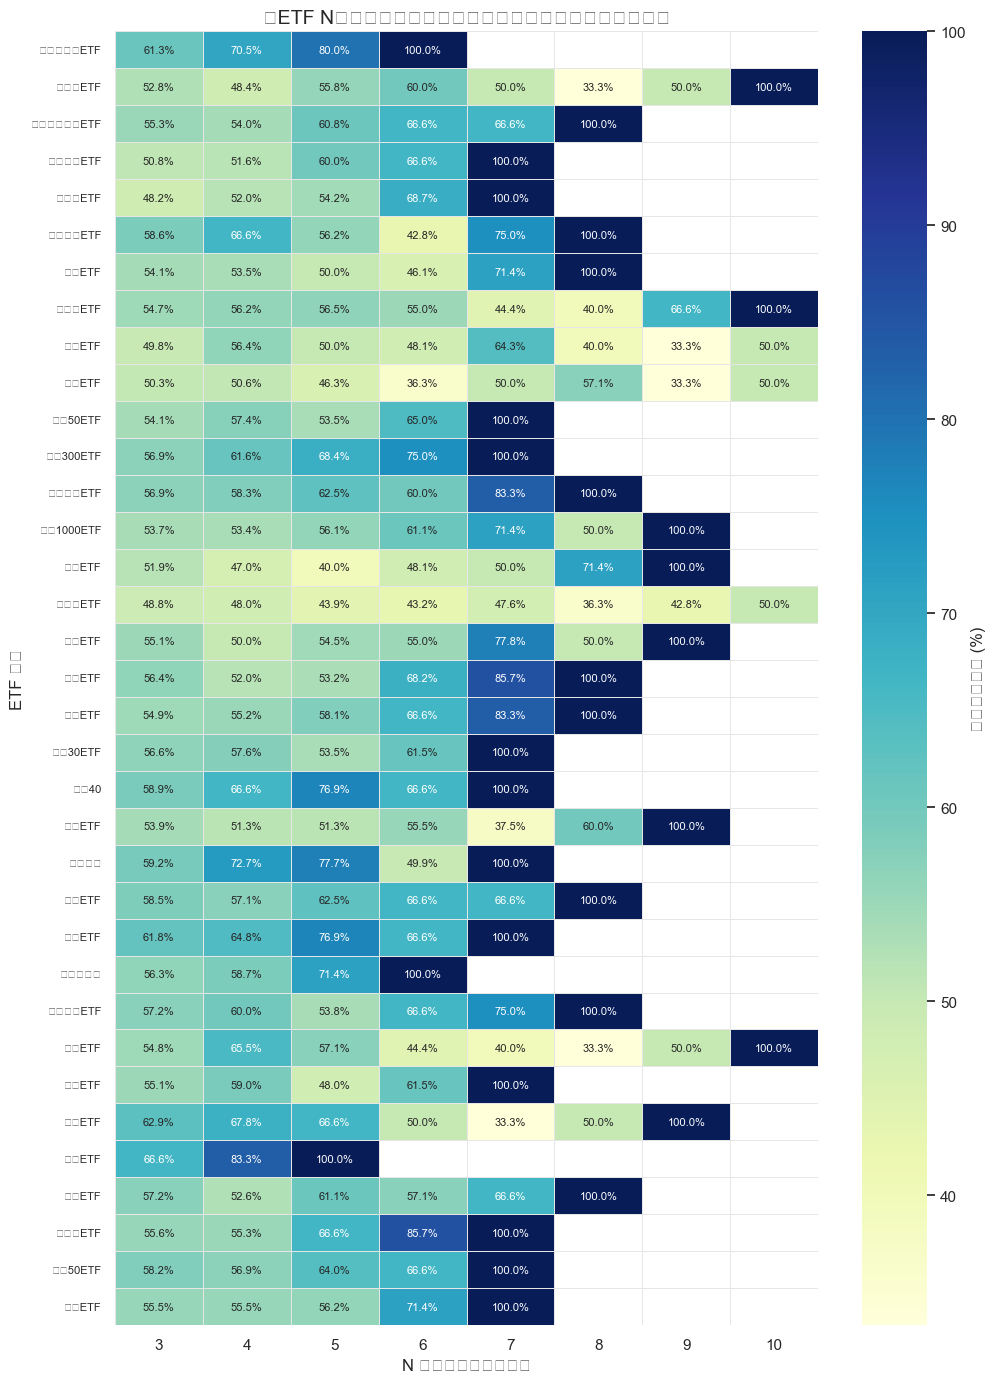

/var/folders/zs/v3w4zkgn4f1b1cghz0w3hj_h0000gn/T/ipykernel_23663/3906496430.py:139: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heat_numeric = heat_turn.applymap(to_percent_num)
/var/folders/zs/v3w4zkgn4f1b1cghz0w3hj_h0000gn/T/ipykernel_23663/3906496430.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = heat_numeric.applymap(lambda v: f"{v:.1f}%" if v == v and not np.isnan(v) else "")
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) Arial.
  fig.canvas.draw()
/opt/anaconda3/envs/fin7/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) Arial.


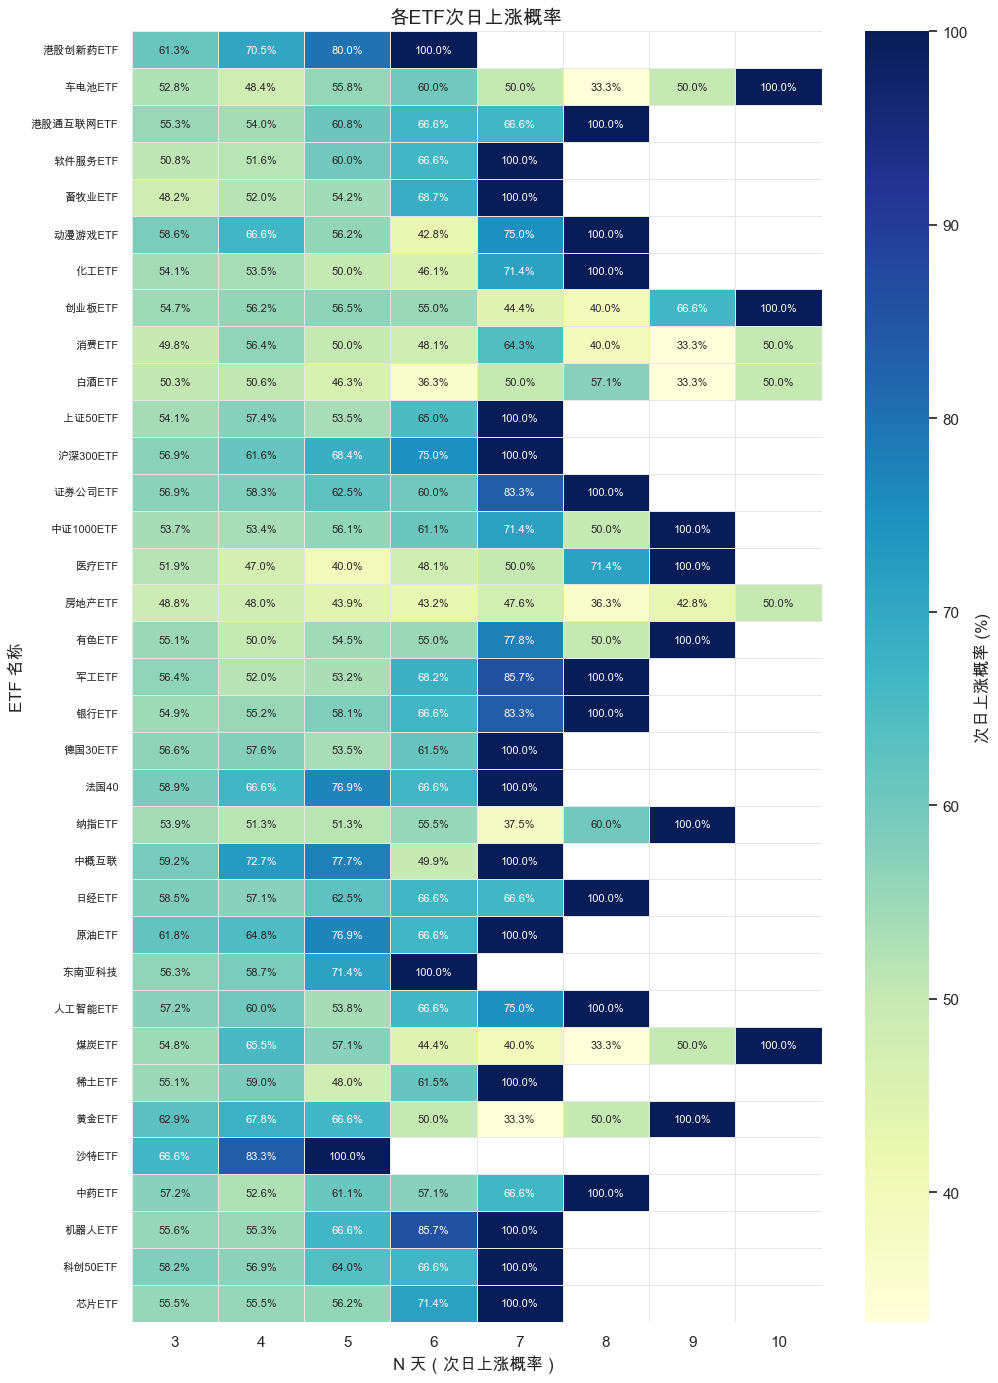

In [27]:
# 新增 cell：绘制 probs 中 "N次日上涨概率" 的热力图，单元格标注为对应 N 次日上涨概率（百分数）
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 确认 probs 已存在
try:
    probs
except NameError:
    raise RuntimeError("变量 `probs` 未定义，请先运行生成 probs 的 cell（生成 probs）。")

# 构建 code -> 名称 映射（使用已有 etf_dict）
etf_name_map = {}
for group in etf_dict.values():
    for name, code in group.items():
        etf_name_map[code] = name

# 提取所有 "次日上涨概率" 列，按 N 数字排序
turn_cols = [c for c in probs.columns if re.search(r"\d+\s*次日", c) or re.search(r"次日上涨概率", c)]
def extract_N(col):
    m = re.search(r"(\d+)", col)
    return int(m.group(1)) if m else 0
turn_cols_sorted = sorted(turn_cols, key=extract_N)

if not turn_cols_sorted:
    raise RuntimeError("在 probs.columns 中未找到任何 '次日上涨概率' 列。列名示例：'3次日上涨概率'。")

# 提取用于绘图的 DataFrame（index 为 ts_code）
heat_turn = probs[turn_cols_sorted].copy()

# 辅助：把字符串/小数概率转换为数值百分比（例如 "12.3%" -> 12.3, 0.123 -> 12.3）
def to_percent_num(x):
    if pd.isna(x) or x == "":
        return np.nan
    if isinstance(x, str) and x.strip().endswith("%"):
        try:
            return float(x.strip().rstrip("%"))
        except:
            return np.nan
    try:
        val = float(x)
        if abs(val) <= 1 and "%" not in str(x):  # 小数概率
            return val * 100
        return val
    except:
        return np.nan

heat_numeric = heat_turn.applymap(to_percent_num)

# 注释文本：直接显示次日上涨概率（保留一位小数并加 %）
annot = heat_numeric.applymap(lambda v: f"{v:.1f}%" if v == v and not np.isnan(v) else "")

# 绘图参数
sns.set(style="white")
fig_height = max(6, min(0.4 * len(heat_numeric), 30))
fig_width = max(6, len(turn_cols_sorted) * 0.9 + 3)
plt.figure(figsize=(fig_width, fig_height))

cmap = sns.color_palette("YlGnBu", as_cmap=True)
ax = sns.heatmap(
    heat_numeric,
    cmap=cmap,
    annot=annot,
    fmt="",
    linewidths=0.5,
    linecolor="#e6e6e6",
    cbar_kws={"label": "次日上涨概率 (%)"},
    annot_kws={"fontsize": 8},
    square=False
)

# 美化坐标轴标签
ax.set_title("各ETF N次日上涨概率热力图（单元格标注为次日上涨概率）", fontsize=14)
ax.set_xlabel("N 天（次日上涨概率）", fontsize=12)
ax.set_ylabel("ETF 名称", fontsize=12)

# 将列名简化为仅显示 N（如 3,4,5,...）
ax.set_xticklabels([str(extract_N(c)) for c in turn_cols_sorted], rotation=0)

# 使用 ETF 名称作为纵坐标标签（回退到 ts_code 如无映射）
yticks_codes = heat_numeric.index.tolist()
ytick_labels = [etf_name_map.get(code, code) for code in yticks_codes]
ax.set_yticklabels(ytick_labels, rotation=0, fontsize=8)

plt.tight_layout()
plt.show()
# filepath: /Users/hao/Desktop/emailreport/prob_calculator.ipynb
# 新增 cell：绘制 probs 中 "N次日上涨概率" 的热力图，单元格标注为对应 N 次日上涨概率（百分数）
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 确认 probs 已存在
try:
    probs
except NameError:
    raise RuntimeError("变量 `probs` 未定义，请先运行生成 probs 的 cell（生成 probs）。")

# 构建 code -> 名称 映射（使用已有 etf_dict）
etf_name_map = {}
for group in etf_dict.values():
    for name, code in group.items():
        etf_name_map[code] = name

# 提取所有 "次日上涨概率" 列，按 N 数字排序
turn_cols = [c for c in probs.columns if re.search(r"\d+\s*次日", c) or re.search(r"次日上涨概率", c)]
def extract_N(col):
    m = re.search(r"(\d+)", col)
    return int(m.group(1)) if m else 0
turn_cols_sorted = sorted(turn_cols, key=extract_N)

if not turn_cols_sorted:
    raise RuntimeError("在 probs.columns 中未找到任何 '次日上涨概率' 列。列名示例：'3次日上涨概率'。")

# 提取用于绘图的 DataFrame（index 为 ts_code）
heat_turn = probs[turn_cols_sorted].copy()

# 辅助：把字符串/小数概率转换为数值百分比（例如 "12.3%" -> 12.3, 0.123 -> 12.3）
def to_percent_num(x):
    if pd.isna(x) or x == "":
        return np.nan
    if isinstance(x, str) and x.strip().endswith("%"):
        try:
            return float(x.strip().rstrip("%"))
        except:
            return np.nan
    try:
        val = float(x)
        if abs(val) <= 1 and "%" not in str(x):  # 小数概率
            return val * 100
        return val
    except:
        return np.nan

heat_numeric = heat_turn.applymap(to_percent_num)

# 注释文本：直接显示次日上涨概率（保留一位小数并加 %）
annot = heat_numeric.applymap(lambda v: f"{v:.1f}%" if v == v and not np.isnan(v) else "")

# 绘图参数
sns.set(style="white")
fig_height = max(6, min(0.4 * len(heat_numeric), 30))
fig_width = max(6, len(turn_cols_sorted) * 0.9 + 3)
plt.figure(figsize=(fig_width, fig_height))

cmap = sns.color_palette("YlGnBu", as_cmap=True)
ax = sns.heatmap(
    heat_numeric,
    cmap=cmap,
    annot=annot,
    fmt="",
    linewidths=0.5,
    linecolor="#e6e6e6",
    cbar_kws={"label": "次日上涨概率 (%)"},
    annot_kws={"fontsize": 8},
    square=False
)

# 美化坐标轴标签
ax.set_title("各ETF次日上涨概率", fontsize=14)
ax.set_xlabel("N 天（次日上涨概率）", fontsize=12)
ax.set_ylabel("ETF 名称", fontsize=12)

# 将列名简化为仅显示 N（如 3,4,5,...）
ax.set_xticklabels([str(extract_N(c)) for c in turn_cols_sorted], rotation=0)

# 使用 ETF 名称作为纵坐标标签（回退到 ts_code 如无映射）
yticks_codes = heat_numeric.index.tolist()
ytick_labels = [etf_name_map.get(code, code) for code in yticks_codes]
ax.set_yticklabels(ytick_labels, rotation=0, fontsize=8)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

plt.tight_layout()
plt.show()